In [1]:
pip install docx2txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install PyPDF2

In [1]:
import os
import pandas as pd
import docx2txt
import csv
import PyPDF2
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# Function to extract text from csv
def extract_text_from_csv(csv_path):
    text_data = []
    with open(csv_path, mode='r', encoding='utf-8', errors='ignore') as file:
        csv_reader = csv.reader(file)
        for row in csv_reader:
            text_data.append(' '.join(row))
    return ' '.join(text_data)

In [3]:
# Function to extract text from docx
def extract_text_from_docx(docx_path):
    try:
        return docx2txt.process(docx_path)
    except Exception as e:
        print(f"Error reading {docx_path}: {e}")
        return ""

# Function to extract text from csv
def extract_text_from_csv(csv_path):
    text_data = []
    try:
        with open(csv_path, mode='r', encoding='utf-8', errors='ignore') as file:
            csv_reader = csv.reader(file)
            for row in csv_reader:
                text_data.append(' '.join(row))
    except Exception as e:
        print(f"Error reading {csv_path}: {e}")
    return ' '.join(text_data)

# Function to extract text from pdf
def extract_text_from_pdf(pdf_path):
    text_data = ''
    try:
        with open(pdf_path, 'rb') as file:
            pdf_reader = PyPDF2.PdfFileReader(file)
            for page in range(pdf_reader.numPages):
                text_data += pdf_reader.getPage(page).extract_text()
    except Exception as e:
        print(f"Error reading {pdf_path}: {e}")
    return text_data

In [4]:
# Function to process files in a directory
def extract_texts_from_folder(folder_path):
    texts = []
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if file_name.endswith('.docx'):
            texts.append(extract_text_from_docx(file_path))
        elif file_name.endswith('.csv'):
            texts.append(extract_text_from_csv(file_path))
        elif file_name.endswith('.pdf'):
            texts.append(extract_text_from_pdf(file_path))
    return texts

In [5]:
!mkdir content

In [6]:
resumes=!unzip</content/Resumesshared.zip>.zip
%ls

 Volume in drive C has no label.
 Volume Serial Number is CE55-F61B

 Directory of c:\Users\aamir\Documents\DATA SCIENCE\PROJECTS\resumes_classification

05-06-2024  15:07    <DIR>          .
01-06-2024  13:48    <DIR>          ..
31-05-2024  15:39    <DIR>          .ipynb_checkpoints
05-06-2024  15:03               562 app.py
31-05-2024  15:34           798,451 code.ipynb
05-06-2024  15:07    <DIR>          content
31-05-2024  15:38                 0 random_forest_model.pkl
18-05-2024  13:32    <DIR>          Resumes
               3 File(s)        799,013 bytes
               5 Dir(s)  226,499,457,024 bytes free


In [10]:
# Function to process files in a directory
def extract_texts_from_folder(folder_path):
    texts = []
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if file_name.endswith('.docx'):
            texts.append(extract_text_from_docx(file_path))
        elif file_name.endswith('.csv'):
            texts.append(extract_text_from_csv(file_path))
        elif file_name.endswith('.pdf'):
            texts.append(extract_text_from_pdf(file_path))
        else:
            print(f"Unsupported file type: {file_name}")
    return texts

# Extract texts from resume folder
folder_path ='Resumes'  # Change this to your actual folder path
texts = extract_texts_from_folder(folder_path)

Unsupported file type: Hari Krishna M_Hexaware.doc
Unsupported file type: Harikrishna Akula_Hexaware.doc
Unsupported file type: Hima Mendu_Hexaware.doc
Unsupported file type: J. Sumanth Royal_Hexaware.doc
Unsupported file type: Madeeswar A_Hexaware.doc
Unsupported file type: Naresh Babu Cherukuri_Hexaware.doc
Unsupported file type: Nazeer Basha.doc
Unsupported file type: Peoplesoft Admin_G Ananda Rayudu.doc
Unsupported file type: Peoplesoft Admin_Gangareddy.doc
Unsupported file type: Peoplesoft Admin_Priyanka Ramadoss.doc
Unsupported file type: Peoplesoft Admin_srinivasarao.doc
Unsupported file type: Peoplesoft Admin_Vinod Akkala.doc
Unsupported file type: PeopleSoft DBA_Ganesh Alladi.doc
Unsupported file type: Peoplesoft Finance_Arun Venu.doc
Unsupported file type: Peoplesoft Finance_Pritam Biswas.doc
Unsupported file type: Peoplesoft Finance_Rahul Ahuja.doc
Unsupported file type: Peoplesoft FSCM_R Ahmed.doc
Unsupported file type: Priyanka L.doc
Unsupported file type: Punugoti Swetha_

In [11]:
folder_path = 'Resumes'  # Change this to your actual folder path
data = extract_texts_from_folder(folder_path)

Unsupported file type: Hari Krishna M_Hexaware.doc
Unsupported file type: Harikrishna Akula_Hexaware.doc
Unsupported file type: Hima Mendu_Hexaware.doc
Unsupported file type: J. Sumanth Royal_Hexaware.doc
Unsupported file type: Madeeswar A_Hexaware.doc
Unsupported file type: Naresh Babu Cherukuri_Hexaware.doc
Unsupported file type: Nazeer Basha.doc
Unsupported file type: Peoplesoft Admin_G Ananda Rayudu.doc
Unsupported file type: Peoplesoft Admin_Gangareddy.doc
Unsupported file type: Peoplesoft Admin_Priyanka Ramadoss.doc
Unsupported file type: Peoplesoft Admin_srinivasarao.doc
Unsupported file type: Peoplesoft Admin_Vinod Akkala.doc
Unsupported file type: PeopleSoft DBA_Ganesh Alladi.doc
Unsupported file type: Peoplesoft Finance_Arun Venu.doc
Unsupported file type: Peoplesoft Finance_Pritam Biswas.doc
Unsupported file type: Peoplesoft Finance_Rahul Ahuja.doc
Unsupported file type: Peoplesoft FSCM_R Ahmed.doc
Unsupported file type: Priyanka L.doc
Unsupported file type: Punugoti Swetha_

In [12]:
# Create a DataFrame
df = pd.DataFrame(data)

# Save DataFrame to CSV
output_csv_path = 'consolidated_resumes.csv'
df.to_csv(output_csv_path, index=False)

print(f"Data has been successfully saved to {output_csv_path}")

Data has been successfully saved to consolidated_resumes.csv


In [13]:
df


,0
0,ANIL KUMAR MADDUKURI \t\t SQL & MSBI Develope...
1,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...
2,Aradhana Tripathi Current Location: Gachibow...
3,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...
4,BUDDHA VAMSI ...
...,...
100,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...
101,...
102,Vinay kumar .v\nWorkday Functional Consultant\...
103,B. vinod kumar OBJECTIVE: Willing to work und...


In [14]:
import pandas as pd

# Path to the CSV file
csv_file_path = 'consolidated_resumes.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the DataFrame and its first few rows to understand its structure
print("DataFrame content:")
print(df.head())

# Display the DataFrame columns
print("\nDataFrame columns:")
print(df.columns)

DataFrame content:
                                                   0
0  ANIL KUMAR MADDUKURI  \t\t SQL & MSBI Develope...
1  ANIL KUMAR MADDUKURI  \t\t\n\nSQL & MSBI Devel...
2   Aradhana Tripathi  Current Location: Gachibow...
3  Aradhana Tripathi\n\n\n\nCurrent Location: Gac...
4  BUDDHA VAMSI                                  ...

DataFrame columns:
Index(['0'], dtype='object')


In [15]:
# Read the CSV file with a specified separator
df = pd.read_csv(csv_file_path, sep=';')  # Change sep=';' to the correct separator if necessary

# Display the DataFrame and its columns
print("DataFrame content with specified separator:")
print(df.head())
print("\nDataFrame columns:")
print(df.columns)

DataFrame content with specified separator:
                                                   0
0  ANIL KUMAR MADDUKURI  \t\t SQL & MSBI Develope...
1  ANIL KUMAR MADDUKURI  \t\t\n\nSQL & MSBI Devel...
2   Aradhana Tripathi  Current Location: Gachibow...
3  Aradhana Tripathi\n\n\n\nCurrent Location: Gac...
4  BUDDHA VAMSI                                  ...

DataFrame columns:
Index(['0'], dtype='object')


In [16]:
# Assuming the CSV has the correct structure and two columns, rename them
if len(df.columns) >= 2:
    df.rename(columns={df.columns[0]: 'category', df.columns[1]: 'text'}, inplace=True)
    print("\nRenamed DataFrame columns:")
    print(df.columns)
else:
    print("The DataFrame does not have enough columns to rename.")

The DataFrame does not have enough columns to rename.


In [17]:
# Check if the columns were renamed successfully
if 'category' in df.columns and 'text' in df.columns:
    # Extract the category and text data
    categories = df['category'].tolist()
    text_data = df['text'].tolist()

    # Display the first few entries of each
    for i in range(min(5, len(categories))):
        print(f"Category {i+1}: {categories[i]}")
        print(f"Text {i+1}:\n{text_data[i]}\n")
else:
    print("The columns 'category' and 'text' are not present in the DataFrame.")

The columns 'category' and 'text' are not present in the DataFrame.


In [18]:
texts

['ANIL KUMAR MADDUKURI  \t\t SQL & MSBI Developer     \t  Summary  2.4 years of experience in MS SQL Server (SSMS) and creating SSIS packages, SSRS Reports by using Microsoft Business Intelligence (MSBI) tools. Expertise in various types of Joins and Sub Queries for writing complex queries involving multiple tables. Handled data manipulation and data consistency by creating Views, Triggers, and Synonyms. Hands on experience in creation, optimization and debugging Stored Procedure and Functions. Familiar in writing queries using CTE, Temporary Tables and Table Variables. Good experience in using Set Operators like Union, Union All, Except and Intersect to assist required data. Experience in manipulate the data from multiple table and report to the client using Aggregate Functions, Windows Functions and String Functions. Worked extensively on Data Extraction, Transformation and Loading (ETL) process in SQL Server Integration Services. Used containers such as for each loop container and s

In [19]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aamir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Path to the CSV file
csv_file_path = 'consolidated_resumes.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Handle missing values (replace NaN with an empty string)
df['0'].fillna('', inplace=True)

# Extract the text data from the 'text' column
text_data = df['0'].tolist()

# Tokenize the text data
tokenized_data = [word_tokenize(str(text)) for text in text_data]

# Display the tokenized data for the first few entries
for i, tokens in enumerate(tokenized_data[:5]):
    print(f"Tokens for text {i+1}:", tokens)

C:\Users\aamir\AppData\Local\Temp\ipykernel_12532\896555881.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['0'].fillna('', inplace=True)


Tokens for text 1: ['ANIL', 'KUMAR', 'MADDUKURI', 'SQL', '&', 'MSBI', 'Developer', 'Summary', '2.4', 'years', 'of', 'experience', 'in', 'MS', 'SQL', 'Server', '(', 'SSMS', ')', 'and', 'creating', 'SSIS', 'packages', ',', 'SSRS', 'Reports', 'by', 'using', 'Microsoft', 'Business', 'Intelligence', '(', 'MSBI', ')', 'tools', '.', 'Expertise', 'in', 'various', 'types', 'of', 'Joins', 'and', 'Sub', 'Queries', 'for', 'writing', 'complex', 'queries', 'involving', 'multiple', 'tables', '.', 'Handled', 'data', 'manipulation', 'and', 'data', 'consistency', 'by', 'creating', 'Views', ',', 'Triggers', ',', 'and', 'Synonyms', '.', 'Hands', 'on', 'experience', 'in', 'creation', ',', 'optimization', 'and', 'debugging', 'Stored', 'Procedure', 'and', 'Functions', '.', 'Familiar', 'in', 'writing', 'queries', 'using', 'CTE', ',', 'Temporary', 'Tables', 'and', 'Table', 'Variables', '.', 'Good', 'experience', 'in', 'using', 'Set', 'Operators', 'like', 'Union', ',', 'Union', 'All', ',', 'Except', 'and', 'Int

In [21]:
# Sample text
text = "NLTK is a leading platform for building Python programs to work with human language data."

# Tokenize the text
tokens = word_tokenize(text)

# Print the tokens
print(tokens)


['NLTK', 'is', 'a', 'leading', 'platform', 'for', 'building', 'Python', 'programs', 'to', 'work', 'with', 'human', 'language', 'data', '.']


In [22]:
import pandas as pd

# Assuming you have extracted text data stored in lists
categories = ['Category A', 'Category B', 'Category C']
text_data = ['Text A', 'Text B', 'Text C']

# Create a dictionary with column names and data
data = {
    'Category': categories,
    'Text': text_data
}

# Create DataFrame
df = pd.DataFrame(data)

# Now df contains columns 'Category' and 'Text' with your extracted data
# You can perform further operations or analysis on this DataFrame

In [23]:
data

{'Category': ['Category A', 'Category B', 'Category C'],
 'Text': ['Text A', 'Text B', 'Text C']}

In [24]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Sample resumes data
resumes_data = [
    "Experience with Python and data analysis. Proficient in SQL and machine learning.",
    "Strong communication skills and ability to work in a team environment.",
    "Extensive experience in project management and leadership roles.",
    "Familiar with web development frameworks such as Django and Flask.",
    "Expertise in statistical analysis and data visualization techniques."
]

# Get English stop words
stop_words = set(stopwords.words('english'))

# Initialize an empty list to store filtered resumes data
filtered_resumes_data = []

# Iterate over each resume data and remove stop words
for resume in resumes_data:
    # Tokenize the resume data
    tokens = word_tokenize(resume)

    # Remove stop words from the tokens
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

    # Join the filtered tokens back into a sentence
    filtered_resume = ' '.join(filtered_tokens)

    # Append the filtered resume to the list
    filtered_resumes_data.append(filtered_resume)

# Print the filtered resumes data
for i, resume in enumerate(filtered_resumes_data):
    print(f"Filtered Resume {i+1}:", resume)


Filtered Resume 1: Experience Python data analysis . Proficient SQL machine learning .
Filtered Resume 2: Strong communication skills ability work team environment .
Filtered Resume 3: Extensive experience project management leadership roles .
Filtered Resume 4: Familiar web development frameworks Django Flask .
Filtered Resume 5: Expertise statistical analysis data visualization techniques .


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aamir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aamir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
import nltk
from nltk.corpus import stopwords

# Download NLTK resources if not already downloaded
nltk.download('stopwords')

# Get stop words for English
stop_words = set(stopwords.words('english'))

# Print the list of stop words
print("List of English stop words:")
print(stop_words)

List of English stop words:
{"couldn't", 'than', 'most', 'our', 'who', "hadn't", 'at', "haven't", "wasn't", 'wouldn', 'what', 'below', 'ain', 'won', 'off', 'against', 'nor', 'its', 'd', "you're", "mightn't", 'when', "you've", 'do', 'an', 'myself', 'had', 'herself', 'ma', 'not', 'further', 'aren', 'does', 'in', 'here', 's', 'will', 'hadn', 'as', 'can', 'a', "doesn't", 'very', "weren't", "won't", 'on', 'needn', 'are', 'until', 'll', 'why', 'he', "didn't", "she's", 'wasn', 'other', 'by', 'be', 'they', 'ourselves', 'because', 're', 'were', 'of', "should've", "wouldn't", 'is', 'am', 'himself', 'if', 'under', 'where', 'itself', 'o', 'down', 'mightn', "it's", 't', 'his', 'there', 'into', 'mustn', 'or', 'some', 'once', 'only', 'just', 'but', 'yours', 'too', 'shouldn', "shouldn't", 'about', 'your', 'with', 'the', 'whom', 'over', 'own', 'couldn', "mustn't", 'their', 'how', 'yourselves', 'same', 'between', 'through', 'above', 'these', 'up', 'and', 'then', 'weren', 'few', 'more', 'hasn', 'should',

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aamir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
import re

# Sample text data with unnecessary information
text_data = [
    "Experience with Python and data analysis. Proficient in SQL and machine learning.",
    "Strong communication skills and ability to work in a team environment.",
    "Extensive experience in project management and leadership roles.",
    "Familiar with web development frameworks such as Django and Flask.",
    "Expertise in statistical analysis and data visualization techniques."
]

# Regular expression pattern to filter out non-alphabetic characters and digits
pattern = r'[^a-zA-Z\s]|\d+'

# Filter out unnecessary text data
filtered_text_data = []
for text in text_data:
    filtered_text = re.sub(pattern, '', text)
    filtered_text_data.append(filtered_text)

# Print the filtered text data
for i, text in enumerate(filtered_text_data):
    print(f"Filtered Text {i+1}: {text}")

Filtered Text 1: Experience with Python and data analysis Proficient in SQL and machine learning
Filtered Text 2: Strong communication skills and ability to work in a team environment
Filtered Text 3: Extensive experience in project management and leadership roles
Filtered Text 4: Familiar with web development frameworks such as Django and Flask
Filtered Text 5: Expertise in statistical analysis and data visualization techniques


In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

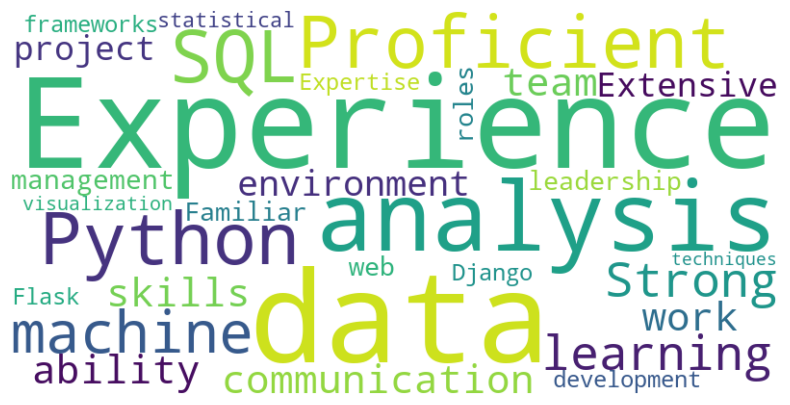

In [28]:
# Join the filtered text data into a single string
text = ' '.join(filtered_text_data)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_font_size=150).generate(text)

In [30]:
wordcloud.to_file("wordcloud.png")

In [31]:
import pandas as pd
from sklearn.datasets import make_classification

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Create DataFrame
df = pd.DataFrame(X, columns=[f"feature_{i+1}" for i in range(X.shape[1])])
df['target'] = y

In [32]:
X = df.drop('target', axis=1)
y = df['target']

In [33]:
X

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
0,-0.669356,-1.495778,-0.870766,1.141831,0.021606,1.730630,-1.251698,0.289305,0.357163,-0.196811,0.829274,0.154850,-0.219970,-0.739137,1.802012,1.634606,-0.938180,-1.267337,-1.276334,1.016643
1,0.093372,0.785848,0.105754,1.272354,-0.846316,-0.979093,1.263707,0.264020,2.411677,-0.960046,0.543479,0.199810,0.288724,0.732492,-0.872002,-1.654887,-1.130204,-0.122709,0.693431,0.911363
2,-0.905797,-0.608341,0.295141,0.943716,0.092936,1.370397,-0.064772,0.287273,-0.533004,-0.032504,-0.549925,-0.510064,-0.868768,-0.598279,0.019832,0.613460,-1.779439,0.830498,-0.737332,-0.578212
3,-0.585793,0.389279,0.698816,0.436236,-0.315082,0.459505,1.448820,0.505558,-1.440982,-1.134020,-0.241431,1.466783,0.678728,-1.190917,-1.442381,-0.929136,-0.221600,-0.346772,0.034246,-1.040199
4,1.146441,0.515579,-1.222895,-0.396230,-1.293508,-0.352428,0.071254,1.239584,1.007133,-1.479444,-0.695695,-0.918127,0.604121,1.068379,-0.882271,2.303639,-0.973379,1.259233,0.360015,1.920368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.519359,1.874906,0.078118,0.081083,0.201653,-2.756306,0.400236,-1.073689,-0.589452,-1.404240,-1.029972,0.046079,2.539382,-0.480648,-1.630771,-0.039894,1.673364,-0.134180,1.792044,0.248325
996,-0.410935,-0.546608,1.134924,0.334300,-0.618983,0.693425,-0.617285,1.087727,0.193022,1.461993,0.956549,-1.011037,-0.256734,0.517721,0.593266,-0.629825,-0.080137,-0.246737,-0.486387,2.211333
997,-0.200135,-1.461082,1.797017,-0.244096,0.544323,1.776031,-2.021994,-0.658113,0.206816,-0.114789,0.858663,0.542985,-0.420264,-0.748275,1.668697,-1.209965,-1.248582,-1.502802,-1.274737,1.601119
998,0.039356,0.248684,-0.475323,-1.136693,1.942577,-1.297109,-0.802722,0.451323,-1.454615,-0.679222,-0.451375,0.153528,0.637119,1.235484,0.780224,1.558384,0.263888,0.099126,0.542692,1.208275


In [34]:
y

0      1
1      0
2      1
3      1
4      0
      ..
995    0
996    1
997    1
998    0
999    0
Name: target, Length: 1000, dtype: int32

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        93
           1       0.95      0.86      0.90       107

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200

Confusion Matrix:
[[88  5]
 [15 92]]


In [38]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [39]:
# Define and evaluate Random Forest
print("Training Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print()

Training Random Forest...
Random Forest Evaluation:
Accuracy: 0.9
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        93
           1       0.95      0.86      0.90       107

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200

Confusion Matrix:
[[88  5]
 [15 92]]



In [40]:
# Define and evaluate Logistic Regression
print("Training Logistic Regression...")
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print()

Training Logistic Regression...
Logistic Regression Evaluation:
Accuracy: 0.855
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        93
           1       0.91      0.80      0.86       107

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200

Confusion Matrix:
[[85  8]
 [21 86]]



In [41]:
# Define and evaluate SVM
print("Training SVM...")
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print()

Training SVM...
SVM Evaluation:
Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        93
           1       0.92      0.83      0.87       107

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200

Confusion Matrix:
[[85  8]
 [18 89]]



In [42]:
# Define models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(kernel='linear', random_state=42)
}

In [43]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Create DataFrame
df = pd.DataFrame(X, columns=[f"feature_{i+1}" for i in range(X.shape[1])])
df['target'] = y

# Set the target variable
X = df.drop('target', axis=1)
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = [
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('SVM', SVC(kernel='linear', random_state=42))
]

# List to store evaluation results
evaluation_results = []

# Evaluate models
for name, model in models:
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    evaluation_results.append({'Model': name, 'Accuracy': accuracy})

# Convert evaluation results to DataFrame
evaluation_df = pd.DataFrame(evaluation_results)

# Show results in one DataFrame
print("Evaluation Results:")
print(evaluation_df)

# Find the model with highest accuracy
max_accuracy_model = evaluation_df.loc[evaluation_df['Accuracy'].idxmax()]

print("\nModel with highest accuracy:")
print(max_accuracy_model)

Training Random Forest...
Training Logistic Regression...
Training SVM...
Evaluation Results:
                 Model  Accuracy
0        Random Forest     0.900
1  Logistic Regression     0.855
2                  SVM     0.870

Model with highest accuracy:
Model       Random Forest
Accuracy              0.9
Name: 0, dtype: object


In [44]:

import pickle


In [55]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load sample data
data = load_iris()
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save the model to a pickle file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved to random_forest_model.pkl")

# Load the model from a pickle file
with open('random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully")


Model saved to random_forest_model.pkl
Model loaded successfully
